# <center> Berlin Airbnb Analysis

<img src="../pictures/alex-galperin-Z9J2Tau44Vg-unsplash.jpg" style="width:900px;"/>

            Original Photo by Alex Galperin on Unsplash on [Unsplash](https://unsplash.com)

In [236]:
'''
We will be using several well known libraries namely pandas, numpy, matplotlib and seaborn
Documentation of each can be found on internet
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---
# <center>STEP 1 - Setting a stage</center>
---

## Business Questions

<font color=red> 
    Q1. Average price a single person has to pay for Berlin's Airbnb apartment?
    
<font color=red> 
    Q2. Which neighborhoods have the most number of listing in Berlin?
    
<font color=red>
    Q3. What is the distribution of Apartment accomodation size in Berlin?
    
<font color=red> 
    Q4. Which type of room has the majority of listings in Berlin Airbnb?


In [237]:
'''
First, we will start with listings.csv file, which contains limited columns containing listing data.
We will not use this for our analysis but it is good idea to look into it to know important columns of dataset
'''
berlin_df_listings = pd.read_csv('../data/berlin/listings.csv')

#list first five rows
berlin_df_listings.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [238]:
#provides number of rows and colums in a dataframe
berlin_df_listings.shape

(22552, 16)

In [239]:
berlin_df_listings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,22552.0,1.571560e+07,8.552069e+06,2015.000000,8.065954e+06,1.686638e+07,2.258393e+07,2.986735e+07
host_id,22552.0,5.403355e+07,5.816290e+07,2217.000000,9.240002e+06,3.126711e+07,8.067518e+07,2.245081e+08
latitude,22552.0,5.250982e+01,3.082546e-02,52.345803,5.248906e+01,5.250908e+01,5.253267e+01,5.265167e+01
longitude,22552.0,1.340611e+01,5.796365e-02,13.103557,1.337541e+01,1.341678e+01,1.343926e+01,1.375764e+01
price,22552.0,6.714367e+01,2.202662e+02,0.000000,3.000000e+01,4.500000e+01,7.000000e+01,9.000000e+03
minimum_nights,22552.0,7.157059e+00,4.066507e+01,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,5.000000e+03
number_of_reviews,22552.0,1.784068e+01,3.676962e+01,0.000000,1.000000e+00,5.000000e+00,1.600000e+01,4.980000e+02
reviews_per_month,18638.0,1.135525e+00,1.507082e+00,0.010000,1.800000e-01,5.400000e-01,1.500000e+00,3.667000e+01
calculated_host_listings_count,22552.0,1.918233e+00,3.667257e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,4.500000e+01
availability_365,22552.0,7.985283e+01,1.193682e+02,0.000000,0.000000e+00,4.000000e+00,1.290000e+02,3.650000e+02


In [240]:
'''
Similarly we will use reviews.csv file which just contains two columns to have quick look.
We will not be using this file for final analysis as there is no busines question which involves reviews.
'''
berlin_df_reviews = pd.read_csv('../data/berlin/reviews.csv')
berlin_df_reviews.head(5)

,listing_id,date
0,2015,2016-04-11
1,2015,2016-04-15
2,2015,2016-04-26
3,2015,2016-05-10
4,2015,2016-05-14


In [241]:
berlin_df_reviews.shape

(401963, 2)

In [242]:
#Here we will use the full reviews which includes review text in comments column

berlin_df_reviews_summary = pd.read_csv('../data/berlin/reviews_summary.csv')
berlin_df_reviews_summary.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [243]:
berlin_df_reviews_summary.shape

(401963, 6)

In [244]:
berlin_df_reviews_summary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
listing_id,401963.0,1.027382e+07,8.097068e+06,2015.0,2421223.0,9085319.0,17106359.0,29849565.0
id,401963.0,1.773751e+08,1.020965e+08,4283.0,86815658.0,179698124.0,267109374.0,346133079.0
reviewer_id,401963.0,5.915480e+07,5.634647e+07,5.0,13976062.0,38394302.0,92662359.0,224475662.0


In [245]:
'''
We will identify missing values in the reviews 
It seems that 496 reviews are missing, since it is a free text we should not provide any 
substituion for those missing values 
'''
berlin_df_reviews_summary.isna().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         496
dtype: int64

In [246]:
'''
listings_summary contain all the columns related to listings dataset
'''

berlin_df_listings_summary = pd.read_csv('../data/berlin/listings_summary.csv')
berlin_df_listings_summary.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [247]:
berlin_df_listings_summary.shape

(22552, 96)

In [248]:
#Quick look at data summary for each column with describe and transpose function
berlin_df_listings_summary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,22552.0,1.571560e+07,8.552069e+06,2.015000e+03,8.065954e+06,1.686638e+07,2.258393e+07,2.986735e+07
scrape_id,22552.0,2.018111e+13,0.000000e+00,2.018111e+13,2.018111e+13,2.018111e+13,2.018111e+13,2.018111e+13
thumbnail_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,22552.0,5.403355e+07,5.816290e+07,2.217000e+03,9.240002e+06,3.126711e+07,8.067518e+07,2.245081e+08
host_acceptance_rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,22526.0,2.330685e+00,1.994782e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.676000e+03
host_total_listings_count,22526.0,2.330685e+00,1.994782e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.676000e+03
latitude,22552.0,5.250982e+01,3.082546e-02,5.234580e+01,5.248906e+01,5.250908e+01,5.253267e+01,5.265167e+01


In [249]:
#listing all the features/columns
list(berlin_df_listings_summary.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [250]:
'''
Let's find out the number of null values in each column.
Columns having more than 75% values null should be dropped as it doesn't help in analysis much.

'''

print(berlin_df_listings_summary.isnull().sum().any())
berlin_df_listings_summary.isnull().sum().sort_values(ascending=False)

True


xl_picture_url                    22552
jurisdiction_names                22552
thumbnail_url                     22552
medium_url                        22552
host_acceptance_rate              22552
                                  ...  
calculated_host_listings_count        0
country_code                          0
smart_location                        0
neighbourhood_group_cleansed          0
id                                    0
Length: 96, dtype: int64

In [251]:
berlin_df_listings_summary.duplicated().sum()

0

In [252]:
#checking the number of unique values for each column
berlin_df_listings_summary.nunique().sort_values()

host_acceptance_rate        0
xl_picture_url              0
medium_url                  0
thumbnail_url               0
jurisdiction_names          0
                        ...  
picture_url             22465
listing_url             22552
longitude               22552
latitude                22552
id                      22552
Length: 96, dtype: int64

In [253]:
#Find out a set of columns with 0 missing values.

berlin_df_listings_no_nulls = set(berlin_df_listings_summary.columns[berlin_df_listings_summary.isnull().mean()==0]) 
print(berlin_df_listings_no_nulls)


{'smart_location', 'minimum_nights', 'bed_type', 'availability_365', 'is_business_travel_ready', 'scrape_id', 'calendar_updated', 'listing_url', 'latitude', 'street', 'room_type', 'property_type', 'has_availability', 'instant_bookable', 'price', 'cancellation_policy', 'requires_license', 'host_id', 'availability_30', 'calculated_host_listings_count', 'maximum_nights', 'last_scraped', 'calendar_last_scraped', 'longitude', 'amenities', 'id', 'require_guest_profile_picture', 'availability_90', 'picture_url', 'guests_included', 'neighbourhood_group_cleansed', 'extra_people', 'host_url', 'availability_60', 'is_location_exact', 'neighbourhood_cleansed', 'require_guest_phone_verification', 'accommodates', 'number_of_reviews', 'host_verifications', 'country_code', 'experiences_offered', 'country'}


In [254]:
#Find out a set of columns with more than 75% of the values missing
listings_most_nulls = set(berlin_df_listings_summary.columns[berlin_df_listings_summary.isnull().mean()> 0.75]) 
print(listings_most_nulls)


{'square_feet', 'thumbnail_url', 'monthly_price', 'host_acceptance_rate', 'weekly_price', 'license', 'xl_picture_url', 'medium_url', 'jurisdiction_names'}


In [255]:
#I have selected the follwing columns for our analysis at the moment 
listings_columns = ['id', 'host_name', 'neighbourhood_cleansed',
               'zipcode', 'property_type', 'room_type',
               'accommodates', 'bathrooms', 'bedrooms',
               'beds', 'amenities', 'price', 'cleaning_fee','bed_type',
               'number_of_reviews', 'review_scores_rating', 'instant_bookable',
              'reviews_per_month', 'guests_included', 'extra_people']


df_listings = berlin_df_listings_summary[listings_columns]
print(df_listings.shape)
df_listings.sample(10)


(22552, 20)


,id,host_name,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,bed_type,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,guests_included,extra_people
835,877939,Andrew,Reuterstraße,12047,Apartment,Private room,2,1.0,1.0,1.0,"{Wifi,Kitchen,""Smoking allowed"",Heating,Washer...",$24.00,NaN,Pull-out Sofa,5,100.0,f,0.22,1,$10.00
12580,18556613,Martina,Zehlendorf Südwest,14109,House,Private room,2,1.0,1.0,1.0,"{Wifi,Heating,""Smoke detector"",""Safety card"",E...",$50.00,$12.00,Real Bed,10,100.0,f,0.57,1,$0.00
13124,19155802,Melani,Wedding Zentrum,13357,Apartment,Private room,2,1.0,1.0,1.0,"{Wifi,Kitchen,""Smoking allowed"",""Pets live on ...",$29.00,NaN,Real Bed,2,NaN,f,0.12,1,$0.00
6923,9964785,Hajo,Karl-Marx-Allee-Süd,10243,Apartment,Private room,1,1.0,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Pets live on this p...",$10.00,NaN,Real Bed,1,80.0,f,0.03,1,$0.00
14494,20466122,Eugenie,Alexanderplatz,10179,Train,Entire home/apt,2,1.0,1.0,2.0,"{Wifi,Kitchen,""Free street parking"",Heating,Wa...",$85.00,$35.00,Real Bed,17,94.0,t,1.36,2,$15.00
8264,12147133,Rebecca,Frankfurter Allee Süd FK,10245,Condominium,Private room,1,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Smoking ...",$40.00,NaN,Real Bed,0,NaN,f,NaN,1,$0.00
7177,10334964,Sandra,Neu Lichtenberg,10317,Apartment,Private room,1,1.0,1.0,1.0,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$20.00,NaN,Real Bed,0,NaN,f,NaN,1,$0.00
9632,14314232,Marco,Moabit West,10553,Apartment,Private room,1,2.0,1.0,1.0,"{TV,Wifi,Kitchen,Heating,Washer,Dryer,Essentia...",$100.00,NaN,Real Bed,2,90.0,f,0.07,1,$0.00
19517,25964633,Kathrin,Neuköllner Mitte/Zentrum,12055,Apartment,Private room,2,1.0,1.0,1.0,"{Wifi,Kitchen,""Pets allowed"",Heating,Washer,Es...",$34.00,$0.00,Real Bed,5,100.0,f,1.15,1,$10.00
19265,25505809,Songfei,Tempelhofer Vorstadt,10965,Apartment,Entire home/apt,2,1.0,1.0,2.0,"{TV,Wifi,Kitchen,Heating,Washer,Essentials,Sha...",$68.00,$40.00,Real Bed,3,100.0,f,1.01,1,$0.00


In [256]:
#investgating the data type for each feature
df_listings.dtypes

id                          int64
host_name                  object
neighbourhood_cleansed     object
zipcode                    object
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
amenities                  object
price                      object
cleaning_fee               object
bed_type                   object
number_of_reviews           int64
review_scores_rating      float64
instant_bookable           object
reviews_per_month         float64
guests_included             int64
extra_people               object
dtype: object

---
# <center>STEP 2 - Analysis </center>
---

In [257]:
#Distribution of listings type
berlin_accomodation_type= df_listings.groupby('room_type').count()['id']

berlin_accomodation_type

room_type
Entire home/apt    10722
Private room       11534
Shared room          296
Name: id, dtype: int64

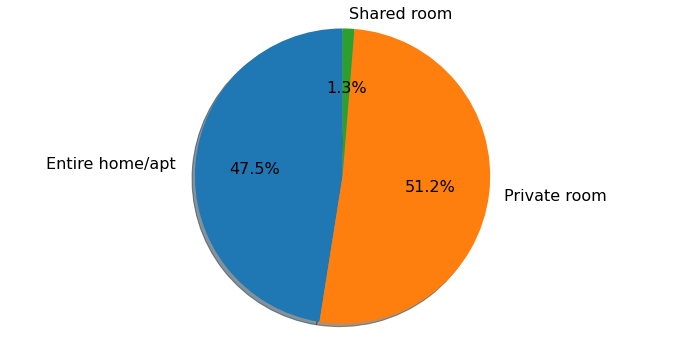

<Figure size 864x432 with 0 Axes>

In [273]:
'''
The following pie chare provides distribution of type of apartment/room available in Berlin.
'''

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Entire home/apt ', 'Private room', 'Shared room'
sizes = [10543, 11370, 283]
explode = (0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
plt.savefig("pie_type_accomodation")


In [259]:
'''
The following charts shows the areas with most number of listings in Berlin
'''
number_of_listings = df_listings.groupby('neighbourhood_cleansed').count()['id'].sort_values(ascending = False)
number_of_listings

neighbourhood_cleansed
Tempelhofer Vorstadt                  1325
Frankfurter Allee Süd FK              1282
Alexanderplatz                        1091
Reuterstraße                          1002
Rixdorf                                880
                                      ... 
Haselhorst                               3
Malchow, Wartenberg und Falkenberg       3
Neu-Hohenschönhausen Süd                 2
MV 2                                     1
Hellersdorf-Ost                          1
Name: id, Length: 136, dtype: int64

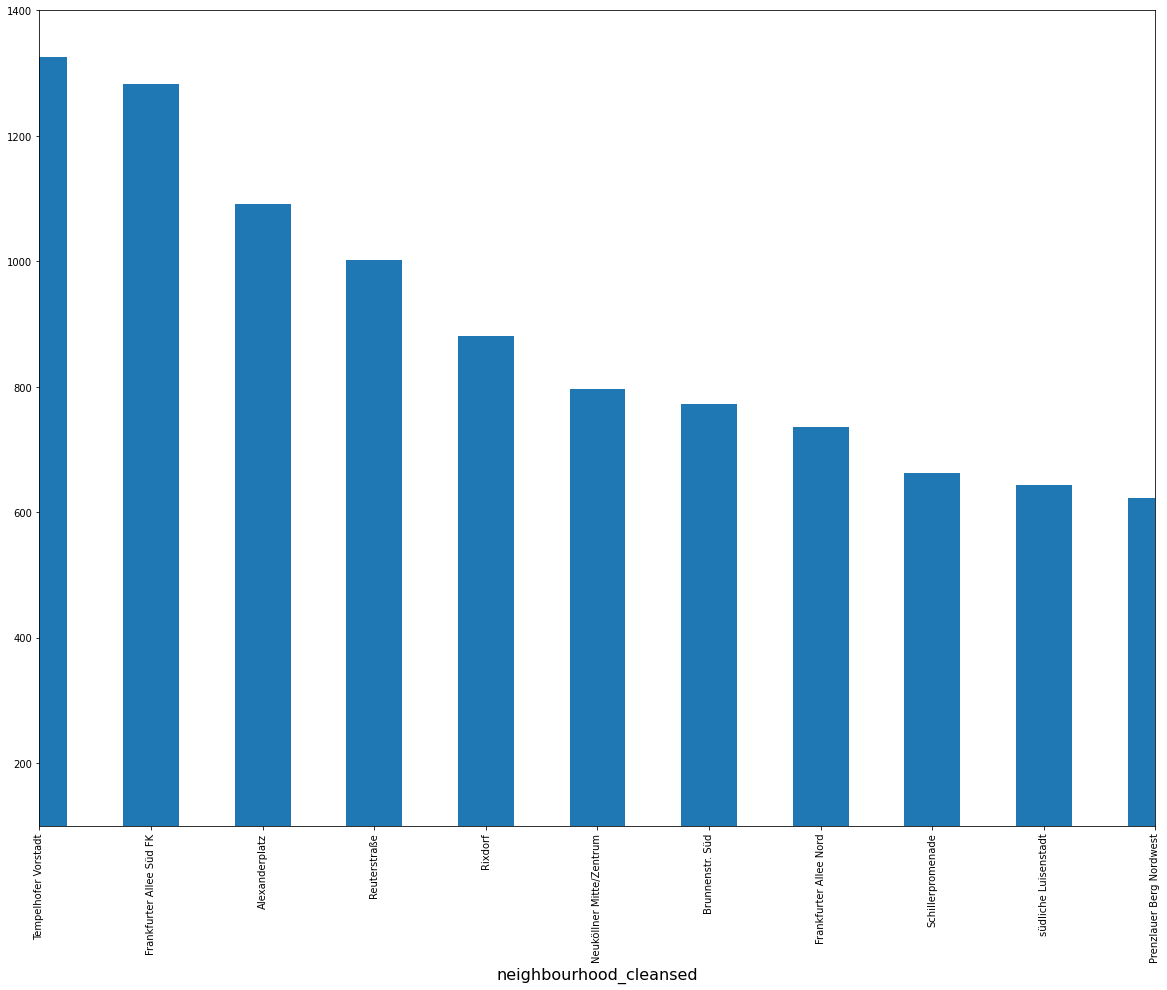

In [260]:
top_areas =number_of_listings.plot(kind="bar", figsize=(20,15))

top_areas.set_ylim([100, 1400]) # we will just used listing count >= 100
top_areas.set_xlim([0, 10]) # we are interested to know top 10 happening areas as a traveller
#plt.xaxis.label.set_size(20)

area_fig = top_areas.get_figure()
area_fig.savefig("accomodation.png")

In [261]:
#The distribution of apartment by number of person it can accomodates
accomodates_person = df_listings.groupby(['accommodates'])['id'].count()
accomodates_person




accommodates
1      2734
2     12228
3      2487
4      3216
5       701
6       733
7       131
8       151
9        36
10       57
11       15
12       24
13        2
14       11
15        6
16       20
Name: id, dtype: int64

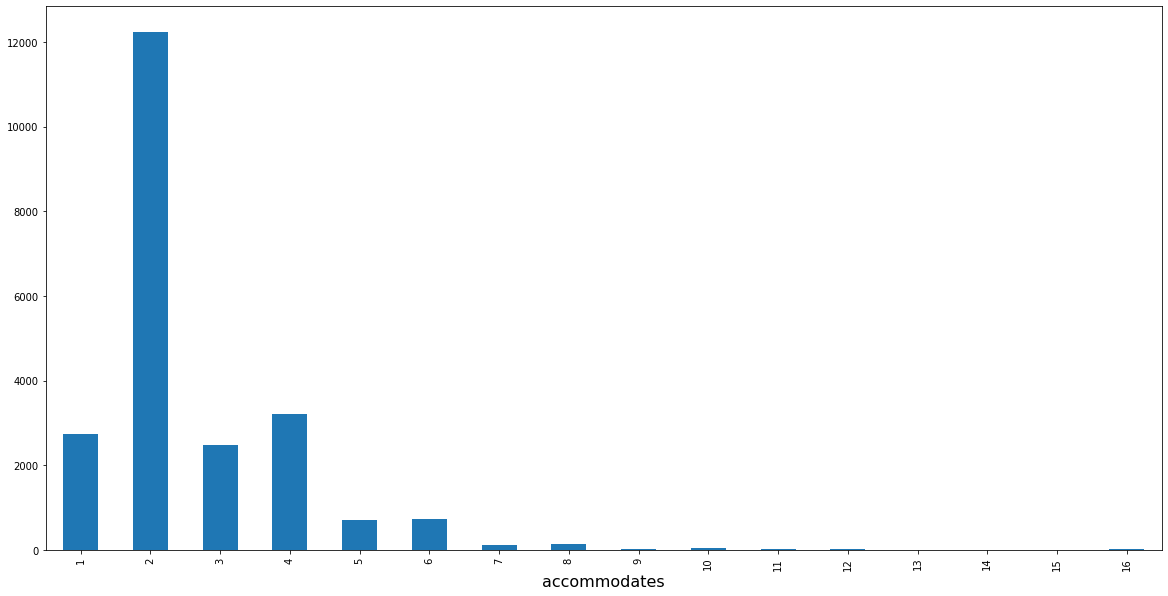

In [262]:
acc_plot = accomodates_person.plot(kind="bar", figsize=(20,10))
fig = acc_plot.get_figure()
fig.savefig("accomodation.png")

In [263]:
'''
Let's choose the following columns which helps us in getting the average price per person for accomodation.

'''
df_average_prices = df_listings[['price', 'accommodates', 'guests_included', 'extra_people','room_type']]
df_average_prices 

,price,accommodates,guests_included,extra_people,room_type
0,$60.00,3,1,$28.00,Entire home/apt
1,$17.00,2,1,$0.00,Private room
2,$90.00,4,2,$20.00,Entire home/apt
3,$26.00,2,1,$18.00,Private room
4,$42.00,2,1,$24.00,Private room
...,...,...,...,...,...
22547,$60.00,2,1,$0.00,Entire home/apt
22548,$20.00,6,1,$10.00,Shared room
22549,$85.00,2,1,$0.00,Entire home/apt
22550,$99.00,2,1,$0.00,Private room


In [264]:
#check if there are any missing values in the chosen dataset 
df_average_prices.isna().sum()


price              0
accommodates       0
guests_included    0
extra_people       0
room_type          0
dtype: int64

In [265]:
#Convert the prices to numerical variable
price_clean = df_average_prices['price'].str.replace("$","").str.replace(',','').astype(float)

price_clean

0        60.0
1        17.0
2        90.0
3        26.0
4        42.0
         ... 
22547    60.0
22548    20.0
22549    85.0
22550    99.0
22551    45.0
Name: price, Length: 22552, dtype: float64

In [266]:
#Obtain the number of people that can be accommodated but are not included in the price
extra_space = (df_average_prices['accommodates'] - df_average_prices['guests_included'])
#Due to inconsistencies in the imported data this number is negative in some rare cases. We floor it to 0.
extra_space = extra_space.apply(lambda x: 0 if x<0 else x)
#Calculate the extra costs
extra_price = extra_space*df_average_prices['extra_people'].str.replace("$","").str.replace(',','').astype(float)


In [267]:
#Obtain the price at full capacity and calculate price per person per night
df_average_prices['price_pp'] = (price_clean + extra_price) / df_average_prices['accommodates']

In [268]:
#Remove outliers using Tukey rule
IQR = df_average_prices['price_pp'].quantile(0.75) - df_average_prices['price_pp'].quantile(0.25)
lower_bound = df_average_prices['price_pp'].quantile(0.25) - 3*IQR
upper_bound = df_average_prices['price_pp'].quantile(0.75) + 3*IQR
lower_bound, upper_bound


(-25.5, 76.0)

In [269]:
#Override lower bound with a positive number 
lower_bound = 5
df_average_prices = df_average_prices[(df_average_prices['price_pp']>lower_bound) & (df_average_prices['price_pp']<upper_bound)]


In [270]:
df_average_prices.shape

(22196, 6)

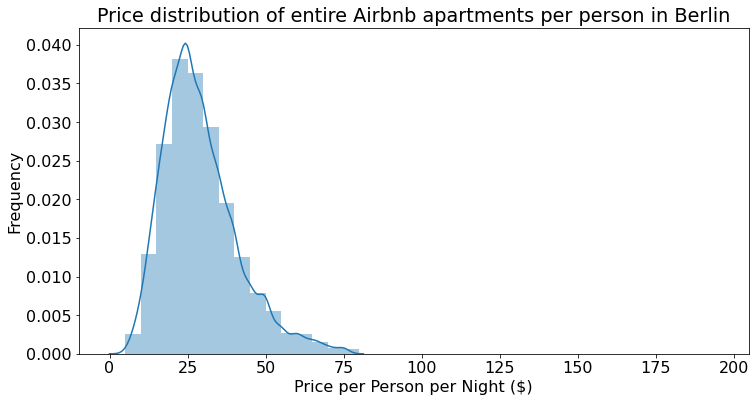

In [271]:
#Distribution of prices after removing outliers
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('axes', labelsize = 16) 
plt.rc('font', size=16)   
sns.distplot(df_average_prices['price_pp'][df_average_prices["room_type"]=='Entire home/apt'],bins = np.arange(0,200,5));
plt.xlabel('Price per Person per Night ($)');
plt.ylabel('Frequency');
plt.title('Price distribution of entire Airbnb apartments per person in Berlin');
plt.savefig('price_distribution')

---
# <center>STEP 3 - Conclusion </center>
---


    Q1. Average price a single person has to pay for Berlin's Airbnb apartment?
      
    A1. Based on chart above, on average, person has to pay 20-40 $ in Berlin for decent accomodation 
    
    Q2. Which neighborhoods have the most number of listing in Berlin?
       
    A2. Tempelhofer Vorstadt
        Frankfurter Allee Süd FK              
        Alexanderplatz                    
        Reuterstraße                      
        Rixdorf

    Q3. What is the distribution of Apartment accomodation size in Berlin?
    
    A3. More than half of the listing accomodates 2 person. 

    Q4. Which type of room has the majority of listings in Berlin Airbnb?
        
    A4. It seems that most of the listing are equally distributed between private room and entire apartments.
        
        

In [272]:
#steps to generate html pages out of notebooks in present directory

!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook berlin_airbnb_analysis.ipynb to html',
 '[NbConvertApp] Writing 499613 bytes to berlin_airbnb_analysis.html']